In [1]:
%load_ext autoreload
%autoreload 2 
import sys
sys.path.append("../../../xapres/")
import xapres as xa
import numpy as np

In [2]:
fd = xa.load.from_dats()
old = fd.load_all(directory='../../data/sample/single_dat_file/', legacy_fft=True, corrected_pad=True).isel(chirp_num=0).profile
new = fd.load_all(directory='../../data/sample/single_dat_file/', legacy_fft=False, kwargs_for_addProfileToDs={'crop_chirp_start':0,'crop_chirp_end':1}
                  ).isel(chirp_num=0).profile


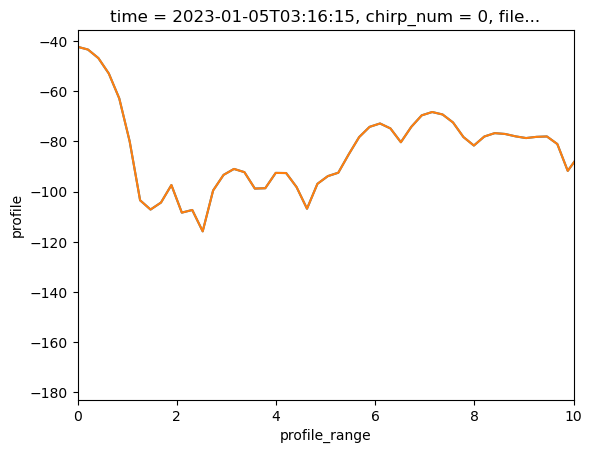

In [3]:
(old.dB()).plot()
new.dB().plot(xlim = (0, 10))

In [6]:
old.attrs['chirp_start'] = 0

In [5]:
new

<xarray.DataArray 'profile' (time: 1, attenuator_setting_pair: 1,
                             profile_range: 39999)> Size: 640kB
array([[[ 7.68978553e-03+0.00000000e+00j,
         -9.27273832e-07+6.77336074e-03j,
         -4.56900891e-03-2.38788254e-06j, ...,
         -5.21329130e-07-4.99838438e-07j,
          2.02641074e-07-8.46271999e-07j,
          1.26782906e-06-2.16599516e-08j]]])
Coordinates:
  * time           (time) datetime64[ns] 8B 2023-01-05T03:16:15
    chirp_num      int64 8B 0
    filename       (time) <U57 228B '../../data/sample/single_dat_file/DATA20...
    burst_number   (time) int64 8B 0
    AFGain         (attenuator_setting_pair) int64 8B -4
    attenuator     (attenuator_setting_pair) float64 8B 22.0
    orientation    (time) <U7 28B 'unknown'
  * profile_range  (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair

In [84]:
ds = fd.load_all(directory='../../data/sample/single_dat_file/', legacy_fft=False, corrected_pad=True)
ds

<xarray.Dataset> Size: 97MB
Dimensions:          (time: 1, chirp_time: 40001, chirp_num: 100,
                      attenuator_setting_pair: 1, profile_range: 39999)
Coordinates:
  * time             (time) datetime64[ns] 8B 2023-01-05T03:16:15
  * chirp_time       (chirp_time) float64 320kB 0.0 2.5e-05 5e-05 ... 1.0 1.0
  * chirp_num        (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    filename         (time) <U57 228B '../../data/sample/single_dat_file/DATA...
    burst_number     (time) int64 8B 0
    AFGain           (attenuator_setting_pair) int64 8B -4
    attenuator       (attenuator_setting_pair) float64 8B 22.0
    orientation      (time) <U7 28B 'unknown'
  * profile_range    (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 32MB ...
    latitude         (time) float64 8B 0.0
    longitude        (time) float64 8B 0.0
    battery_voltage  (time) float64 8B 0.0
    temperature_1    (time) float64 8B 2.891
    temperature_2    (time) float64 8B 511.8
    profile          (time, chirp_num, attenuator_setting_pair, profile_range) complex128 64MB ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-10-09 14:36:57.486737

In [80]:
ds.chirp.computeProfile()

<xarray.DataArray 'profile' (time: 1, chirp_num: 100,
                             attenuator_setting_pair: 1, profile_range: 39999)> Size: 64MB
array([[[[ 7.68978553e-03+0.00000000e+00j,
          -9.27273832e-07+6.77336074e-03j,
          -4.56900891e-03-2.38788254e-06j, ...,
          -5.21329130e-07-4.99838438e-07j,
           2.02641074e-07-8.46271999e-07j,
           1.26782906e-06-2.16599516e-08j]],

        [[ 7.69291628e-03+0.00000000e+00j,
          -4.65191502e-07+6.77615015e-03j,
          -4.57086350e-03-1.61378129e-06j, ...,
          -9.08098710e-07+2.85821091e-07j,
          -5.30522409e-07-9.73941848e-07j,
           1.12872192e-06-5.98828832e-07j]],

        [[ 7.69441439e-03+0.00000000e+00j,
          -5.68561906e-07+6.77757061e-03j,
          -4.57209974e-03-1.85846492e-06j, ...,
           1.27636810e-06-6.26149904e-07j,
           2.36619677e-07+1.03064573e-06j,
          -7.00436130e-07-4.74906535e-08j]],
...
        [[ 7.55867888e-03+0.00000000e+00j,
          -1.30092000e-07+6.65786473e-03j,
          -4.49106035e-03-1.07170797e-06j, ...,
           5.98589909e-07-3.91519477e-07j,
           5.05116032e-07+2.76446351e-07j,
           2.20810081e-07+4.90185512e-07j]],

        [[ 7.55818154e-03+0.00000000e+00j,
          -1.00088592e-08+6.65753356e-03j,
          -4.49111002e-03-8.97569910e-07j, ...,
          -9.05339415e-08-3.53241214e-07j,
           2.13017850e-07+4.42310039e-08j,
           2.76789329e-07+1.96950921e-08j]],

        [[ 7.55803475e-03+0.00000000e+00j,
          -8.02547022e-08+6.65740261e-03j,
          -4.49101016e-03-9.11393854e-07j, ...,
           1.40825291e-06+8.15137952e-07j,
          -6.98290429e-07+1.46028701e-06j,
          -1.34931239e-06-4.58747559e-07j]]]])
Coordinates:
  * time           (time) datetime64[ns] 8B 2023-01-05T03:16:15
  * chirp_num      (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
    filename       (time) <U57 228B '../../data/sample/single_dat_file/DATA20...
    burst_number   (time) int64 8B 0
    AFGain         (attenuator_setting_pair) int64 8B -4
    attenuator     (attenuator_setting_pair) float64 8B 22.0
    orientation    (time) <U7 28B 'unknown'
  * profile_range  (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Attributes:
    long_name:    profile
    units:        -
    description:  complex profile computed from the fourier transform of the ...

In [81]:
ds.chirp.computeProfile(constants=ds.attrs['constants'])

<xarray.DataArray 'profile' (time: 1, chirp_num: 100,
                             attenuator_setting_pair: 1, profile_range: 39999)> Size: 64MB
array([[[[ 7.68978553e-03+0.00000000e+00j,
          -9.27273832e-07+6.77336074e-03j,
          -4.56900891e-03-2.38788254e-06j, ...,
          -5.21329130e-07-4.99838438e-07j,
           2.02641074e-07-8.46271999e-07j,
           1.26782906e-06-2.16599516e-08j]],

        [[ 7.69291628e-03+0.00000000e+00j,
          -4.65191502e-07+6.77615015e-03j,
          -4.57086350e-03-1.61378129e-06j, ...,
          -9.08098710e-07+2.85821091e-07j,
          -5.30522409e-07-9.73941848e-07j,
           1.12872192e-06-5.98828832e-07j]],

        [[ 7.69441439e-03+0.00000000e+00j,
          -5.68561906e-07+6.77757061e-03j,
          -4.57209974e-03-1.85846492e-06j, ...,
           1.27636810e-06-6.26149904e-07j,
           2.36619677e-07+1.03064573e-06j,
          -7.00436130e-07-4.74906535e-08j]],
...
        [[ 7.55867888e-03+0.00000000e+00j,
          -1.30092000e-07+6.65786473e-03j,
          -4.49106035e-03-1.07170797e-06j, ...,
           5.98589909e-07-3.91519477e-07j,
           5.05116032e-07+2.76446351e-07j,
           2.20810081e-07+4.90185512e-07j]],

        [[ 7.55818154e-03+0.00000000e+00j,
          -1.00088592e-08+6.65753356e-03j,
          -4.49111002e-03-8.97569910e-07j, ...,
          -9.05339415e-08-3.53241214e-07j,
           2.13017850e-07+4.42310039e-08j,
           2.76789329e-07+1.96950921e-08j]],

        [[ 7.55803475e-03+0.00000000e+00j,
          -8.02547022e-08+6.65740261e-03j,
          -4.49101016e-03-9.11393854e-07j, ...,
           1.40825291e-06+8.15137952e-07j,
          -6.98290429e-07+1.46028701e-06j,
          -1.34931239e-06-4.58747559e-07j]]]])
Coordinates:
  * time           (time) datetime64[ns] 8B 2023-01-05T03:16:15
  * chirp_num      (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
    filename       (time) <U57 228B '../../data/sample/single_dat_file/DATA20...
    burst_number   (time) int64 8B 0
    AFGain         (attenuator_setting_pair) int64 8B -4
    attenuator     (attenuator_setting_pair) float64 8B 22.0
    orientation    (time) <U7 28B 'unknown'
  * profile_range  (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Attributes:
    long_name:    profile
    units:        -
    description:  complex profile computed from the fourier transform of the ...

In [27]:
%%timeit
ds = fd.load_all(directory='../../data/sample/single_dat_file/', legacy_fft=True, corrected_pad=True)
ds

969 ms ± 43.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
